# Train the RBM on ising model rotated Ising Model Configurations but each rotation is used only once:

In [1]:
import sys
import os
sys.path.append('Jerome_scripts_Original/PGM/')
sys.path.append('selfPackages/')
sys.path.append('Jerome_scripts_Original/')

import numpy as np
import scipy as sc
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

try:
    import rbm
    import bm
except:
    print 'Compiling cy_utilities first'
    curr_dir = os.getcwd()
    os.chdir('PGM/')
    !python setup.py build_ext --inplace
    print 'Compilation done'
    os.chdir(curr_dir)
    
import pickle
from ising import IsingModel
import estimate_correlations_ising
from sklearn.utils import shuffle
import inlineMovies
from scipy.integrate import odeint

In [34]:
import dill
dill.dump_session('./data_bruckner/data/notebookData/12_exactlySymmetricTraining_almost.db')

In [5]:
import dill
dill.load_session('./data_bruckner/data/notebookData/12_exactlySymmetricTraining_almost.db')

In [2]:
N = 100
beta = 1.
Num_configs = 10000

#Generate spins using Gibbs Sampling MCMC
BM = bm.BM(N=N,nature='Spin')

#Define Couplings
BM.layer.couplings =  beta* (np.eye(N=N,k=1) + np.eye(N=N,k=-1) )
BM.layer.couplings[0,-1] += beta
BM.layer.couplings[-1,0] += beta

data = np.zeros([Num_configs,N])
data_master = BM.gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs/N,Nstep=200) # N steps.

# Rotate each configuration all the unique times possible and then do the same for a new configuration

k=0
for i in range(Num_configs/N):
    for j in range(N):
        data[k] = np.roll(data_master[i],j)
        k = k+1

In [5]:
%%capture capt1
#Supress the output of the cell and save it to capt1

#Train the model
RBM = rbm.RBM(visible = 'Spin', n_v=N, n_h = 1, hidden = 'Spin',zero_field = True)
results = RBM.fit(data,n_iter=200,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=100,N_MC= 20, lr_decay=False,batch_norm=False);

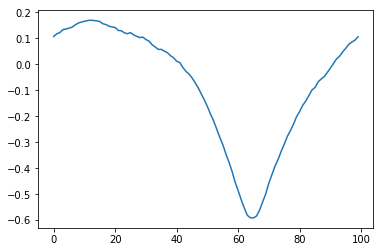

In [9]:
plt.plot(np.roll(np.array(results['W'])[-1,0],-20))

## Find the solution to the equation starting from these initial conditions

In [28]:
def Remi_Moshir(y,t):
    dydt = (np.roll(y,1) + np.roll(y,-1)) + (y**3 - y*np.sum(y**2))
    return 0.001*dydt

init_cond = np.array(results['W'])[-1,0]
time_int = np.linspace(0,50000,10000)
sol1 = odeint(Remi_Moshir,init_cond,time_int) 

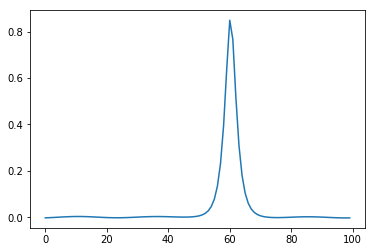

In [30]:
plt.plot(sol1[-1,:])

In [ ]:
plt.plot

## Two hidden units:

In [26]:
%%capture capt2
#Supress the output of the cell and save it to capt1

#Train the model
RBM2 = rbm.RBM(visible = 'Spin', n_v=N, n_h = 2, hidden = 'Spin',zero_field = True)
results2 = RBM2.fit(data,n_iter=100,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=100,N_MC= 20, lr_decay=False,batch_norm=False);

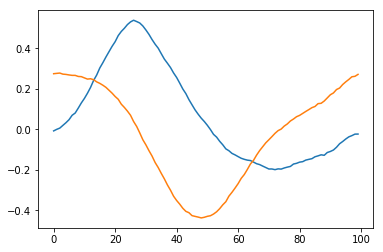

In [28]:
plt.plot(np.roll(np.array(results2['W'])[-1,0],-0))
plt.plot(np.roll(np.array(results2['W'])[-1,1],-0))

## Small Beta:

In [7]:
N = 100
beta2 = 0.1
Num_configs = 10000

#Generate spins using Gibbs Sampling MCMC
BM2 = bm.BM(N=N,nature='Spin')

#Define Couplings
BM2.layer.couplings =  beta2* (np.eye(N=N,k=1) + np.eye(N=N,k=-1))
BM2.layer.couplings[0,-1] += beta2
BM2.layer.couplings[-1,0] += beta2

data2 = np.zeros([Num_configs,N])
data_master2 = BM2.gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs/N,Nstep=200) # N steps.

# Rotate each configuration all the unique times possible and then do the same for a new configuration

k=0
for i in range(Num_configs/N):
    for j in range(N):
        data2[k] = np.roll(data_master2[i],j)
        k = k+1

In [10]:
%%capture capt3
#Supress the output of the cell and save it to capt1

#Train the model
RBM3 = rbm.RBM(visible = 'Spin', n_v=N, n_h = 1, hidden = 'Spin',zero_field = True)
results3 = RBM.fit(data2,n_iter=200,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=100,N_MC= 20, lr_decay=False,batch_norm=False);

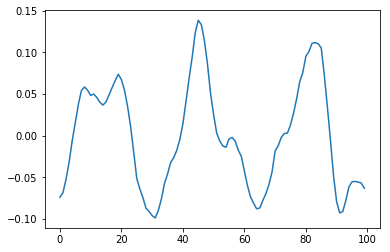

In [16]:
plt.plot(np.roll(np.array(results3['W'])[-1,0],-0))

## Larger Beta = 1.5

In [19]:
N = 100
beta3 = 1.3
Num_configs = 10000

#Generate spins using Gibbs Sampling MCMC
BM3 = bm.BM(N=N,nature='Spin')

#Define Couplings
BM3.layer.couplings =  beta3* (np.eye(N=N,k=1) + np.eye(N=N,k=-1))
BM3.layer.couplings[0,-1] += beta3
BM3.layer.couplings[-1,0] += beta3

data3 = np.zeros([Num_configs,N])
data_master3 = BM3.gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs/N,Nstep=200) # N steps.

# Rotate each configuration all the unique times possible and then do the same for a new configuration

k=0
for i in range(Num_configs/N):
    for j in range(N):
        data3[k] = np.roll(data_master3[i],j)
        k = k+1

In [20]:
%%capture capt4
#Supress the output of the cell and save it to capt1

#Train the model
RBM4 = rbm.RBM(visible = 'Spin', n_v=N, n_h = 1, hidden = 'Spin',zero_field = True)
results4 = RBM.fit(data3,n_iter=200,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=100,N_MC= 20, lr_decay=False,batch_norm=False);

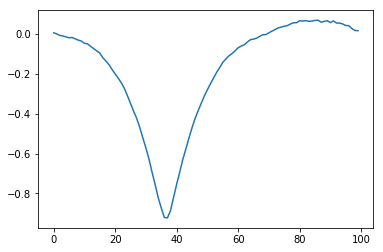

In [22]:
plt.plot(np.roll(np.array(results4['W'])[-1,0],20))

## Beta = 0

In [23]:
N = 100
beta4 = 0.
Num_configs = 10000

#Generate spins using Gibbs Sampling MCMC
BM4 = bm.BM(N=N,nature='Spin')

#Define Couplings
BM4.layer.couplings =  beta4* (np.eye(N=N,k=1) + np.eye(N=N,k=-1))
BM4.layer.couplings[0,-1] += beta4
BM4.layer.couplings[-1,0] += beta4

data4 = np.zeros([Num_configs,N])
data_master4 = BM4.gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs/N,Nstep=200) # N steps.

# Rotate each configuration all the unique times possible and then do the same for a new configuration

k=0
for i in range(Num_configs/N):
    for j in range(N):
        data4[k] = np.roll(data_master4[i],j)
        k = k+1

In [24]:
%%capture capt5
#Supress the output of the cell and save it to capt1

#Train the model
RBM5 = rbm.RBM(visible = 'Spin', n_v=N, n_h = 1, hidden = 'Spin',zero_field = True)
results5 = RBM.fit(data4,n_iter=200,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=100,N_MC= 20, lr_decay=False,batch_norm=False);

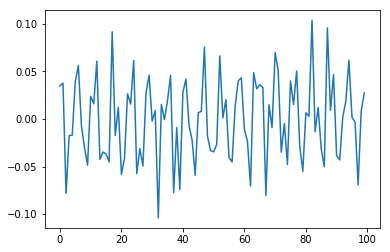

In [25]:
plt.plot(np.roll(np.array(results5['W'])[-1,0],0))

In [31]:
N = 100
beta5 = 0.2
Num_configs = 10000

#Generate spins using Gibbs Sampling MCMC
BM5 = bm.BM(N=N,nature='Spin')

#Define Couplings
BM5.layer.couplings =  beta5* (np.eye(N=N,k=1) + np.eye(N=N,k=-1))
BM5.layer.couplings[0,-1] += beta5
BM5.layer.couplings[-1,0] += beta5

data5 = np.zeros([Num_configs,N])
data_master5 = BM5.gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs/N,Nstep=200) # N steps.

# Rotate each configuration all the unique times possible and then do the same for a new configuration

k=0
for i in range(Num_configs/N):
    for j in range(N):
        data5[k] = np.roll(data_master5[i],j)
        k = k+1

In [32]:
%%capture capt6
#Supress the output of the cell and save it to capt1

#Train the model
RBM6 = rbm.RBM(visible = 'Spin', n_v=N, n_h = 1, hidden = 'Spin',zero_field = True)
results6 = RBM.fit(data5,n_iter=200,verbose=0,learning_rate = 0.001,record=['W'],record_interval=100,batch_size=100,N_MC= 20, lr_decay=False,batch_norm=False);

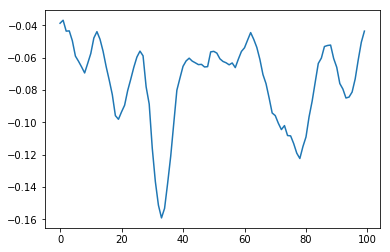

In [33]:
plt.plot(np.roll(np.array(results6['W'])[-1,0],0))